In [1]:
import gensim

In [2]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [3]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [4]:
len(new_model['university'])

C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


100

In [5]:
new_model.similarity('university','school') > 0.3

C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


True

In [6]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [7]:
len(model.vocab)

43981

In [8]:
len(model['university'])

300

In [9]:
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918290138245),
 ('faculty', 0.6780907511711121),
 ('undergraduate', 0.6587096452713013)]

In [10]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

C:\Users\dinesh\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [11]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118192911148071)]

In [12]:
model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884091734886169)]

In [13]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['university'])))

In [14]:
for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

In [15]:
# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

In [16]:
# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

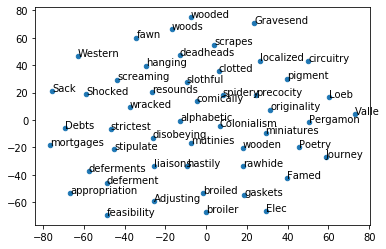

In [17]:
# Show the scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)
#Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()